In [15]:
import gym
import numpy as np
import random
from utils import run_animation, store_episode_as_gif
from IPython.display import clear_output

env = gym.make("Taxi-v3", render_mode="rgb_array").env

In [16]:
"""Training the agent"""
q_table = np.zeros([env.observation_space.n, env.action_space.n])

# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 1.0  # Discount rate
epsilon = 0.1  # Exploration rate
num_episodes = 10000  # Number of episodes

# Output for plots
cum_rewards = np.zeros([num_episodes])
total_epochs = np.zeros([num_episodes])

In [17]:
for episode in range(1, num_episodes+1):
    # Reset environment
    state, info = env.reset()
    epoch = 0 
    num_failed_dropoffs = 0
    done = False
    cum_reward = 0

    while not done:
        
        if random.uniform(0, 1) < epsilon:
            "Basic exploration [~0.47m]"
            action = env.action_space.sample() # Sample random action (exploration)
            
            "Exploration with action mask [~1.52m]"
            # action = env.action_space.sample(env.action_mask(state)) "Exploration with action mask"
        else:      
            "Exploitation with action mask [~1m52s]"
            # action_mask = np.where(info["action_mask"]==1,0,1) # invert
            # masked_q_values = np.ma.array(q_table[state], mask=action_mask, dtype=np.float32)
            # action = np.ma.argmax(masked_q_values, axis=0)

            "Exploitation with random tie breaker [~1m19s]"
            #  action = np.random.choice(np.flatnonzero(q_table[state] == q_table[state].max()))
            
            "Basic exploitation [~47s]"
            action = np.argmax(q_table[state]) # Select best known action (exploitation)

        next_state, reward, done, _ , info = env.step(action) 

        cum_reward += reward
        
        old_q_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_q_value = (1 - alpha) * old_q_value + alpha * (reward + gamma * next_max)
        
        q_table[state, action] = new_q_value
        
        if reward == -10:
            num_failed_dropoffs += 1

        state = next_state
        epoch += 1
        
        total_epochs[episode-1] = epoch
        cum_rewards[episode-1] = cum_reward

    if episode % 100 == 0:
        # clear_output(wait=True)
        print(f"Episode #: {episode}")

Episode #: 100
Episode #: 200
Episode #: 300
Episode #: 400
Episode #: 500
Episode #: 600
Episode #: 700
Episode #: 800
Episode #: 900
Episode #: 1000
Episode #: 1100
Episode #: 1200
Episode #: 1300
Episode #: 1400
Episode #: 1500
Episode #: 1600
Episode #: 1700
Episode #: 1800
Episode #: 1900
Episode #: 2000
Episode #: 2100
Episode #: 2200
Episode #: 2300
Episode #: 2400
Episode #: 2500
Episode #: 2600
Episode #: 2700
Episode #: 2800
Episode #: 2900
Episode #: 3000
Episode #: 3100
Episode #: 3200
Episode #: 3300
Episode #: 3400
Episode #: 3500
Episode #: 3600
Episode #: 3700
Episode #: 3800
Episode #: 3900
Episode #: 4000
Episode #: 4100
Episode #: 4200
Episode #: 4300
Episode #: 4400
Episode #: 4500
Episode #: 4600
Episode #: 4700
Episode #: 4800
Episode #: 4900
Episode #: 5000
Episode #: 5100
Episode #: 5200
Episode #: 5300
Episode #: 5400
Episode #: 5500
Episode #: 5600
Episode #: 5700
Episode #: 5800
Episode #: 5900
Episode #: 6000
Episode #: 6100
Episode #: 6200
Episode #: 6300
E

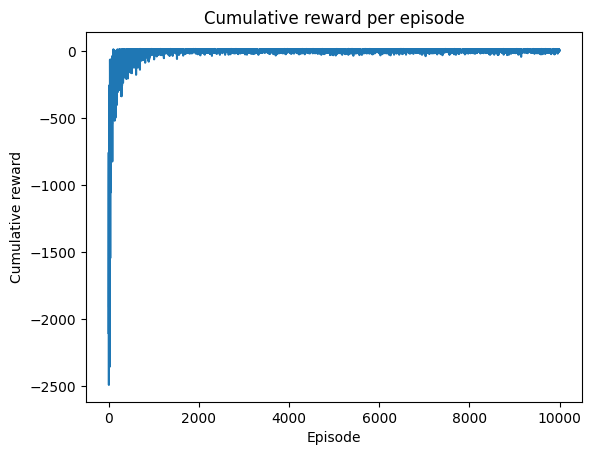

In [19]:
import matplotlib.pyplot as plt
# Plot reward convergence
plt.title("Cumulative reward per episode")
plt.xlabel("Episode")
plt.ylabel("Cumulative reward")
plt.plot(cum_rewards)
plt.show()

In [21]:
q_table

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 6.47336746,  4.23199967,  4.52371082,  5.114108  , 11.        ,
        -0.51381424],
       [ 9.65553422, 11.16737641,  8.40532727,  9.48116965, 15.        ,
         2.94023833],
       ...,
       [-1.        , 12.13057883,  0.79493769, -0.92695604, -1.9281    ,
        -1.        ],
       [-1.6843324 , -2.44527497, -2.48952099,  8.98217603, -3.80563549,
        -2.98825376],
       [-0.2       , -0.2       , -0.2       , 18.52465072, -0.73571158,
        -1.        ]])

In [22]:
np.save("q_table.npy", q_table)